# How Americans Like their Steak?
Source: [Article from Fivethirtyeight.com](https://fivethirtyeight.com/features/how-americans-like-their-steak/)

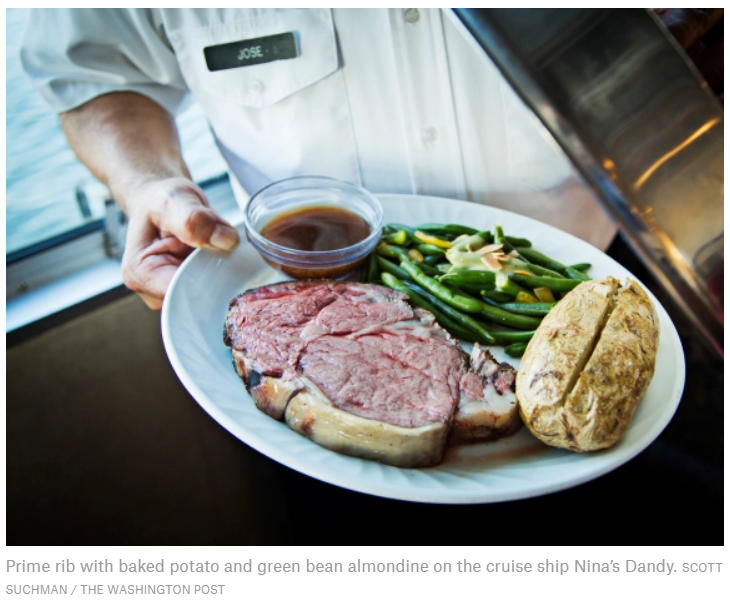

Image Source: Original - Suchman / THE WASHINGTON POST & 
Screenshot from Fivethirtyeight.com aforementioned article by author Walt Hickey

In [27]:
#Import pandas & read the csv
import pandas as pd

#redoing the column names as the ones in the dataset are too long.
col = ["ID","Lottery","Smoke","Alcohol","Gamble","Skydiving","Overspeed","Cheat","EatSteak","SteakType","Gender", "Age","Income","Education","Location"]
st = pd.read_csv("C:\Python38\steak-risk-survey.csv", names = col )

In [28]:
#Observing the head of the dataset.
st.head()

,ID,Lottery,Smoke,Alcohol,Gamble,Skydiving,Overspeed,Cheat,EatSteak,SteakType,Gender,Age,Income,Education,Location
0,RespondentID,Consider the following hypothetical situations...,Do you ever smoke cigarettes?,Do you ever drink alcohol?,Do you ever gamble?,Have you ever been skydiving?,Do you ever drive above the speed limit?,Have you ever cheated on your significant other?,Do you eat steak?,How do you like your steak prepared?,Gender,Age,Household Income,Education,Location (Census Region)
1,NaN,Response,Response,Response,Response,Response,Response,Response,Response,Response,Response,Response,Response,Response,Response
2,3237565956,Lottery B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3234982343,Lottery A,No,Yes,No,No,No,No,Yes,Medium rare,Male,> 60,"$50,000 - $99,999",Some college or Associate degree,East North Central
4,3234973379,Lottery A,No,Yes,Yes,No,Yes,Yes,Yes,Rare,Male,> 60,"$150,000+",Graduate degree,South Atlantic


In [29]:
#dropping the redundant rows i.e. the row with long column names and carried over text
st = st.drop([0,1,2], axis=0)
st.head()

,ID,Lottery,Smoke,Alcohol,Gamble,Skydiving,Overspeed,Cheat,EatSteak,SteakType,Gender,Age,Income,Education,Location
3,3234982343,Lottery A,No,Yes,No,No,No,No,Yes,Medium rare,Male,> 60,"$50,000 - $99,999",Some college or Associate degree,East North Central
4,3234973379,Lottery A,No,Yes,Yes,No,Yes,Yes,Yes,Rare,Male,> 60,"$150,000+",Graduate degree,South Atlantic
5,3234972383,Lottery B,Yes,Yes,Yes,No,Yes,Yes,Yes,Medium,Male,> 60,"$50,000 - $99,999",Bachelor degree,New England
6,3234958833,Lottery B,No,Yes,No,No,Yes,Yes,Yes,Medium,Male,> 60,"$50,000 - $99,999",Graduate degree,Middle Atlantic
7,3234955240,Lottery A,No,No,No,No,Yes,No,Yes,Medium rare,Male,18-29,"$0 - $24,999",Some college or Associate degree,West South Central


In [30]:
#Datatypes
datatype = st.dtypes
print(datatype)

ID           object
Lottery      object
Smoke        object
Alcohol      object
Gamble       object
Skydiving    object
Overspeed    object
Cheat        object
EatSteak     object
SteakType    object
Gender       object
Age          object
Income       object
Education    object
Location     object
dtype: object


In [31]:
#Checking for null values in all columns
#Ref.: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html
st.shape
#st.isnull().sum()

(549, 15)

In [32]:
#Checking for null values in all columns
#Ref.: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html
st.isnull().sum()

ID             0
Lottery        4
Smoke         12
Alcohol        8
Gamble        12
Skydiving     11
Overspeed     10
Cheat         10
EatSteak      10
SteakType    117
Gender        35
Age           35
Income       119
Education     37
Location      37
dtype: int64

In [33]:
#Ref.: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
st.dropna(inplace=True)
st.isnull().sum()

ID           0
Lottery      0
Smoke        0
Alcohol      0
Gamble       0
Skydiving    0
Overspeed    0
Cheat        0
EatSteak     0
SteakType    0
Gender       0
Age          0
Income       0
Education    0
Location     0
dtype: int64

In [34]:
#Shape of the dataset
st.shape

(331, 15)

In [35]:
#Datatypes
datatype = st.dtypes
print(datatype)

ID           object
Lottery      object
Smoke        object
Alcohol      object
Gamble       object
Skydiving    object
Overspeed    object
Cheat        object
EatSteak     object
SteakType    object
Gender       object
Age          object
Income       object
Education    object
Location     object
dtype: object


In [36]:
#converting the datatype to string
st['Education'] = st['Education'].astype('|S')

In [37]:
#Using label encoder to covert categorical data into numerical equivalent
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
st.loc[:, 'Lottery'] = labelencoder_X.fit_transform(st.loc[:,'Lottery'])
st.loc[:, 'Smoke'] = labelencoder_X.fit_transform(st.loc[:,'Smoke'])
st.loc[:, 'Alcohol'] = labelencoder_X.fit_transform(st.loc[:,'Alcohol'])
st.loc[:, 'Gamble'] = labelencoder_X.fit_transform(st.loc[:,'Gamble'])
st.loc[:, 'Skydiving'] = labelencoder_X.fit_transform(st.loc[:,'Skydiving'])
st.loc[:, 'Overspeed'] = labelencoder_X.fit_transform(st.loc[:,'Overspeed'])
st.loc[:, 'Cheat'] = labelencoder_X.fit_transform(st.loc[:,'Cheat'])
st.loc[:, 'EatSteak'] = labelencoder_X.fit_transform(st.loc[:,'EatSteak'])
st.loc[:, 'SteakType'] = labelencoder_X.fit_transform(st.loc[:,'SteakType'])
st.loc[:, 'Gender'] = labelencoder_X.fit_transform(st.loc[:,'Gender'])
st.loc[:, 'Age'] = labelencoder_X.fit_transform(st.loc[:,'Age'])
st.loc[:, 'Income'] = labelencoder_X.fit_transform(st.loc[:,'Income'])
st.loc[:, 'Location'] = labelencoder_X.fit_transform(st.loc[:,'Location'])

In [38]:
#difining the features and labels
X = st.drop(['ID', 'SteakType','Education'], axis = 1)
y = st['SteakType']
X.shape

(331, 12)

In [39]:
#import train_test_split & spliting  data
from sklearn.model_selection import train_test_split
trainf, testf, trainl, testl = train_test_split(X, y, test_size=0.3, random_state=10)

In [42]:
#Random Forests
# Calling a class from a library
from sklearn.ensemble import RandomForestClassifier

#Evaluation of your model
from sklearn.metrics import accuracy_score

# Fitting the model / training
obj = RandomForestClassifier(max_depth=3, random_state=0)
obj.fit(trainf, trainl)

# predictions
results = obj.predict(testf)

print(results)

#Evaluation
acc = accuracy_score(testl, results)

print(acc)

[0 0 2 2 2 2 2 2 2 2 2 0 2 2 0 0 2 0 0 0 2 2 0 2 2 2 0 2 2 2 2 2 2 2 0 2 2
 2 0 2 2 0 2 2 2 0 0 2 2 2 2 2 2 2 0 0 0 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2
 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2]
0.42


In [14]:
#Precision, Recall, & F1 score
from sklearn.metrics import classification_report
print(classification_report(testl,results))

              precision    recall  f1-score   support

           1       0.30      0.41      0.35        29
           2       0.00      0.00      0.00        19
           3       0.48      0.66      0.56        44
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         5

    accuracy                           0.41       100
   macro avg       0.16      0.21      0.18       100
weighted avg       0.30      0.41      0.35       100



c:\users\namz\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
